# <h1><center><font color='black'>Pokemon's Stats Analysis</font> </center></h1>

*Sergio Chavez Lazo*

*24 of June 2021*

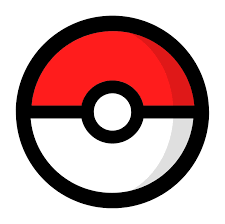
    
**This is my first project on my path to become a data analyst** and I cannot imagine a better way to start it than using a dataset that reminds me one of my favorite series of all time: Pokemon. 

I will answer 9questions that I have always have about pokemons by using my basic coding skills. The questions are:

1. Which is the generation with more legendaries?
2. Which is the generation with more megas?
3. If we choose the best pokemon for each feature (Attack, Defense, etc,) how would the team look like?
3. If we choose the best legendary pokemon for each feature (Attack, Defense, etc,) how would the team look like?
4. What could be a good way to categorize non-legendary nor megas pokemons based on their Total Stats? 
4. If we choose the best pokemon for each feature in every type of pokemon, how would the team look like for each type? Which team would be the more balanced?
5. Is there any significative difference on Total's among all the types? (ANOVA)
6. Is there any correlation between features? Is this correlation more or less strong among each generation?
7. Is there any asociation between been legendary and first type of pokemon? (Chi square)
8. Can we predict if one pokemon is legendary or not based on his total? (Logistic Regression)

I will use the dataset provided by Keith Galli in one of the most [helpful tutorial](https://www.youtube.com/watch?v=vmEHCJofslg&t=1226s) I have ever seen to use Pandas



## Getting and cleaning the data

###  A. Getting the data from github

To get the data and start cleaning it, we need our first library [pandas](https://pandas.pydata.org/). We notice that the dataset is in a csv file, so we import it with the function read_csv. Since now, the df object would be the original dataset

In [356]:
import pandas as pd

url='https://raw.githubusercontent.com/sergiochavezlazo/pandas/master/pokemon_data.csv'
df=pd.read_csv(url)
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


### B. First changes

By checking the dataset, there are four major changes we want to apply before we start the analysis. 

- Replace the NaN values in the column "Type 2"
- Calculate a new column "Total Stats" that sum all the feature of every pokemon
- Give a name to each generation 
- Create a new column that woul help us to know the numer of pokemons.

**Replace the NaN values in the column "Type 2"**

In [357]:
df.fillna(0, inplace=True)

**Calculate a new column "Total Stats" that sum all the feature of every pokemon**

In [358]:
df["Total"]=df.iloc[:,4:10].sum(axis=1)

**Give a name to each generation** *(Be aware that = mean assing, and == means equal)*

In [359]:
generation=["Kanto","Jhoto","Hoenn","Sinnoh","Teselia","Kalos"]
df["Labeled generation"]=1

for i in range (6):
    df.loc[df["Generation"]==i+1, "Labeled generation"]=generation[0+i]
    i=+1

**Create a new column that would help us to know the number of pokemons.**

In [360]:
df["N° of pokemon"]=1

**Check if some values are correct. For instance, check if Mew is labeled as legendary**

In [361]:
#Check which is the state of Mew

df.loc[df["Name"]=="Mew"]
    
#We know have the index value of Mew in the ROWS (165)

df.columns.get_loc("Legendary")

#We now also know the index of the COLUMN (11)

df.iloc[165,11]=True

#Then, we just have to check it

df.loc[df["Name"]=="Mew"]


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,Labeled generation,N° of pokemon
165,151,Mew,Psychic,0,100,100,100,100,100,100,1,True,600,Kanto,1


**Now lets just take note of some basic coding for exploration**

In [7]:
#Search the columns of your dataset
df.columns
#Find the possible values in one column (for this command, the () makes the difference)
df["Type 1"].unique()
#Check the datatypes in the dataset
df.dtypes

#                      int64
Name                  object
Type 1                object
Type 2                object
HP                     int64
Attack                 int64
Defense                int64
Sp. Atk                int64
Sp. Def                int64
Speed                  int64
Generation             int64
Legendary               bool
Total                  int64
Labeled generation    object
N° of pokemon          int64
dtype: object

### C. Creating subsets

Now, we want to create 4 subsets, one that excludes legendaries, and one that excludes legendaries and megas, one that just contains legendaries and one that just contains megas

In [11]:
#Dataset without legendaries

df_nl=df.loc[df["Legendary"]==False]

In [439]:
#Dataset without legendaries and megas

df_nop=df.loc[(~df["Name"].str.contains("Mega"))&(df["Legendary"]==False)]

In [369]:
#Dataset of just legendaries (no mega legendaries)

df_leg=df.loc[df["Legendary"]==True]

df_leg=df_leg.loc[~df_leg["Name"].str.contains("Mega")]


(60, 15)

In [94]:
#Dataset with just Megas
df_megas=df.loc[df["Name"].str.contains("Mega")]

## Question 1. Which is the generation with more legendaries?

To answer this question we will have to apply the function groupby and agg (this command is very helpful, flexible and precise)

In [27]:
df_leg.groupby(["Labeled generation","Generation"]).agg({"N° of pokemon":"count"}).sort_values("Generation",ascending=True)

,,N° of pokemon
Labeled generation,Generation,
Kanto,1,7
Jhoto,2,5
Hoenn,3,18
Sinnoh,4,13
Teselia,5,15
Kalos,6,8


Now lets plot the results. To do this, we will need new libraries: matplotlib and seaborn

In [39]:
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
plot1=df_leg.groupby(["Labeled generation","Generation"]).agg({"N° of pokemon":"count"}).sort_values("Generation",ascending=True)

plot1=pd.DataFrame(plot1)

plot1.reset_index(inplace=True)

plot1.columns

Index(['Labeled generation', 'Generation', 'N° of pokemon'], dtype='object')

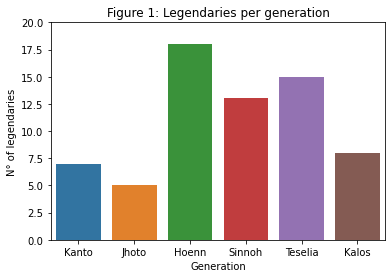

In [86]:
ax1=sns.barplot(data=plot1, x="Labeled generation", y="N° of pokemon")

ax1.set(title="Figure 1: Legendaries per generation",ylabel="N° of legendaries",xlabel="Generation",ylim=(0, 20))
plt.show()

## Question 2. Which is the generation with more megas?

To answe this question we will have to use the groupby command and agg. 

In [100]:
plot2 = df_megas.groupby(["Labeled generation","Generation"]).agg({"N° of pokemon":"count"}).sort_values("Generation",ascending=True)

plot2=pd.DataFrame(plot2)

plot2.reset_index(inplace=True)

plot2

,Labeled generation,Generation,N° of pokemon
0,Kanto,1,15
1,Jhoto,2,7
2,Hoenn,3,20
3,Sinnoh,4,5
4,Teselia,5,1
5,Kalos,6,1


Now lets plot the results

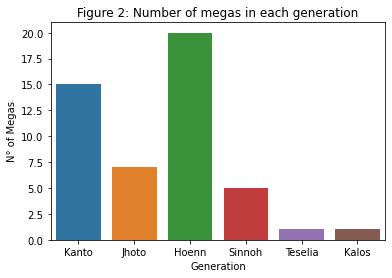

In [103]:
ax2=sns.barplot(data=plot2, x="Labeled generation",y="N° of pokemon")

ax2.set(title="Figure 2: Number of megas in each generation",ylabel="N° of Megas", xlabel="Generation")
plt.show()

**Interpretation of Q1 and Q2**: *The results of question 1 and 2 show that Hoenn is the generation with more legendaries and more Megas until this moment. This could be the reason why this region is considered the best generation among the pokemon fans community.*

## QUESTION 3. If we choose the best pokemon for each feature (Attack, Defense, etc,) how would the team look like?

In [313]:
df_b1=df_nop.sort_values("Speed",ascending=False).head(1)
df_b1

best_pokemons=[]

In [314]:
for e in range(6):
        a="df_n"
        b=str(features[e])
        globals()[a+b]=df_nop.sort_values(features[e],ascending=False).head(1)
        best_pokemons.append(globals()[a+b])
        e=+1
    
#Be careful of not running this cell more than one time because you will still appending more objects to the list best_pokemons

In [315]:
#Now we give the dataframe the format of pandas

import numpy as np

best_pokemons=pd.DataFrame(np.row_stack(best_pokemons))

namescolumns=df.columns

best_pokemons.columns=namescolumns

best_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,Labeled generation,N° of pokemon
0,242,Blissey,Normal,0,255,10,10,75,135,55,2,False,540,Jhoto,1
1,409,Rampardos,Rock,0,97,165,60,65,50,58,4,False,495,Sinnoh,1
2,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,505,Jhoto,1
3,681,AegislashBlade Forme,Steel,Ghost,60,150,50,150,50,60,6,False,520,Kalos,1
4,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,505,Jhoto,1
5,291,Ninjask,Bug,Flying,61,90,45,50,50,160,3,False,456,Hoenn,1


*If we check the dataframe that we have just created, we will notice that Shucckle is the pokemon with the best defense and Sp. Defense. In order to not repeat the same pokemon twice, we will erase one row and append the next pokemon*

### Droping duplicate values based on one criteria (or column)
Be aware that it would drop the second row, so if you want to eliminate the first row, just change the order of the dataframe

In [316]:
best_pokemons.drop_duplicates(subset="Name",inplace=True)

In [317]:
df_florges=df_nop.sort_values("Sp. Def",ascending=False).head(2)

df_florges1=df_florges.iloc[1]

pd.DataFrame(df_florges1)

best_pokemons=best_pokemons.append(df_florges1)

best_pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,Labeled generation,N° of pokemon
0,242,Blissey,Normal,0,255,10,10,75,135,55,2,False,540,Jhoto,1
1,409,Rampardos,Rock,0,97,165,60,65,50,58,4,False,495,Sinnoh,1
2,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,505,Jhoto,1
3,681,AegislashBlade Forme,Steel,Ghost,60,150,50,150,50,60,6,False,520,Kalos,1
5,291,Ninjask,Bug,Flying,61,90,45,50,50,160,3,False,456,Hoenn,1
739,671,Florges,Fairy,0,78,65,68,112,154,75,6,False,552,Kalos,1


In [328]:
feature=["HP", "Attack","Defense","Sp. Atk","Speed","Sp. Defense"]

for e in range(6):
    print("Based on", feature[e],"the best non legendary pokemon is:", best_pokemons.iloc[e,1])

Based on HP the best non legendary pokemon is: Blissey
Based on Attack the best non legendary pokemon is: Rampardos
Based on Defense the best non legendary pokemon is: Shuckle
Based on Sp. Atk the best non legendary pokemon is: AegislashBlade Forme
Based on Speed the best non legendary pokemon is: Ninjask
Based on Sp. Defense the best non legendary pokemon is: Florges



HP | Attack| Defense| Sp.Attack| Speed| Sp. Defense
- | - | -| -| -| -
<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/242.png" alt="Drawing" style="width: 500px;"/> | <img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/409.png" alt="Drawing" style="width: 500px;"/> |<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/213.png" alt="Drawing" style="width: 500px;"/>|<img src="https://gamepress.gg/pokemonmasters/sites/pokemonmasters/files/styles/300h/public/2019-08/pm0746_12_sword3_256.ktx.png?itok=QaQSMD01" alt="Drawing" style="width: 500px;"/>|<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/291.png" alt="Drawing" style="width: 500px;"/>|<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/671.png" alt="Drawing" style="width: 500px;"/>

## QUESTION 4. If we choose the best legendary pokemon for each feature (Attack, Defense, etc,) how would the team look like?

This is the same question but applied for the dataset that only contains legendaries

In [370]:
speciality=["HP","Attack","Defense","Sp. Atk", "Sp. Def","Speed"]
best_legendary=[]

for i in range(6):
    ji=df_leg.sort_values(speciality[i],ascending=False).head(1)
    best_legendary.append(ji)

In [372]:
legendaries=pd.DataFrame(np.row_stack(best_legendary))

columns=df_leg.columns             
    
legendaries.columns=columns

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,Labeled generation,N° of pokemon
0,487,GiratinaAltered Forme,Ghost,Dragon,150,100,120,100,120,90,4,True,680,Sinnoh,1
1,386,DeoxysAttack Forme,Psychic,0,50,180,20,180,20,150,3,True,600,Hoenn,1
2,377,Regirock,Rock,0,80,100,200,50,100,50,3,True,580,Hoenn,1
3,382,KyogrePrimal Kyogre,Water,0,100,150,90,180,160,90,3,True,770,Hoenn,1
4,378,Regice,Ice,0,80,50,100,100,200,50,3,True,580,Hoenn,1
5,386,DeoxysSpeed Forme,Psychic,0,50,95,90,95,90,180,3,True,600,Hoenn,1


In [380]:
for i in range(6):
    print("Based on",feature[i],"the best legendary is:",legendaries.iloc[i,1])

Based on HP the best legendary is: GiratinaAltered Forme
Based on Attack the best legendary is: DeoxysAttack Forme
Based on Defense the best legendary is: Regirock
Based on Sp. Atk the best legendary is: KyogrePrimal Kyogre
Based on Speed the best legendary is: Regice
Based on Sp. Defense the best legendary is: DeoxysSpeed Forme


HP|Attack|Defense|Sp. Attack|Sp. Defense|Speed
-|-|-|-|-|-
<img src="https://www.imore.com/sites/imore.com/files/styles/large/public/field/image/2019/12/pokemon-487-giratina-origin.png" alt="Drawing" style="width: 500px;"/> |<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/386_f2.png" alt="Drawing" style="width: 500px;"/>|<img src="https://pokemon-project.com/espadaescudo/img/pokemon/377.png" alt="Drawing" style="width: 500px;"/>|<img src="https://2.bp.blogspot.com/-tZ5o7bFUOt0/WzAQQLv0KiI/AAAAAAAABsI/LD1LI610gq4tzzeAfj9hBNgrmv1XxU51ACLcBGAs/s320/Kyogre%2BPrimigenio.png" alt="Drawing" style="width: 500px;"/>|<img src="http://vignette1.wikia.nocookie.net/pokemon/images/b/b2/378Regice_AG_anime.png/revision/latest?cb=20140311090228" alt="Drawing" style="width: 500px;"/>|<img src="https://images.gameinfo.io/pokemon/256/386-14.png" alt="Drawing" style="width: 500px;"/>

## QUESTION 5: What could be a good way to categorize non-legendary nor megas pokemons based on their Total Stats? 

First we need to explore the Totals of all pokemon to figure out which could be the best way to categorize them

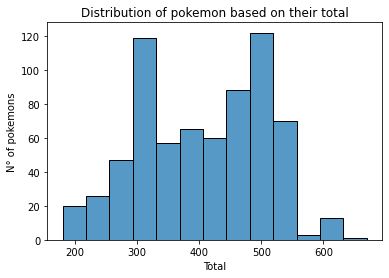

In [413]:
ax3=sns.histplot(data=df_nop,x="Total")
ax3.set(title="Distribution of pokemon based on their total",ylabel="N° of pokemons")
plt.show()

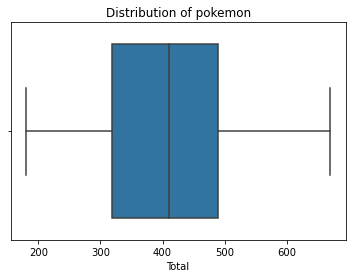

In [417]:
ax4=sns.boxplot(data=df_nop,x="Total")
ax4.set(title="Distribution of pokemon")
plt.show()

In [418]:
df_nop.agg({"Total":["mean","min","max","median"]})

,Total
mean,405.680174
min,180.000000
max,670.000000
median,411.000000


The histogram and the boxplot as well as the statistics give us an idea of how the pokemon are distributed based on their total. For instance, we can observe that the first quartile goest up to 320, the second quartile goes up to 410, the third quartile goes up to 500 and the last quartile goes up to 670. 

Based on this data we proposse to categorize pokemons in 4 groups:

- **Very weaks = 180 to 320**
- **Weaks = 321 to 410**
- **Strongs = 411 to 500**
- **Elites = 501 to 670**

In [448]:
df_nop["Level"]="Hola"

for i in range(691):
    if df_nop.iloc[i,12]<321:
        df_nop.iloc[i,15]="Very weak"
    elif df_nop.iloc[i,12]<411:
        df_nop.iloc[i,15]="Weak"
    elif df_nop.iloc[i,12]<501:
        df_nop.iloc[i,15]="Strong"
    elif df_nop.iloc[i,12]<671:
        df_nop.iloc[i,15]="Elite"

<ipython-input-448-36206cb5a13c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nop["Level"]="Hola"
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [483]:
df_nop

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,Labeled generation,N° of pokemon,Level
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,Kanto,1,Very weak
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,Kanto,1,Weak
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,Kanto,1,Elite
4,4,Charmander,Fire,0,39,52,43,60,50,65,1,False,309,Kanto,1,Very weak
5,5,Charmeleon,Fire,0,58,64,58,80,65,80,1,False,405,Kanto,1,Weak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,85,100,122,58,75,54,6,False,494,Kalos,1,Strong
788,712,Bergmite,Ice,0,55,69,85,32,35,28,6,False,304,Kalos,1,Very weak
789,713,Avalugg,Ice,0,95,117,184,44,46,28,6,False,514,Kalos,1,Elite
790,714,Noibat,Flying,Dragon,40,30,35,45,40,55,6,False,245,Kalos,1,Very weak


Now that we have labeled all pokemon based on their total, we will plot the results in a barplot

In [485]:
levelpokemon=df_nop.groupby("Level").agg({"N° of pokemon":"count"})
levelpokemon=levelpokemon.reset_index()
levelpokemon

,Level,N° of pokemon
0,Elite,118
1,Strong,229
2,Very weak,183
3,Weak,161


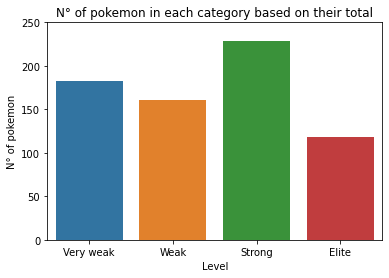

In [489]:
ax5=sns.barplot(data=levelpokemon,x="Level",y="N° of pokemon",order=["Very weak","Weak","Strong","Elite"])
ax5.set(title="N° of pokemon in each category based on their total", ylim=(0,250))
plt.show()

To go even further, we can create a barplot that show the difference among generations

In [523]:
levelpokemon3=df_nop.groupby(["Labeled generation","Level"]).agg({"Total":"count"})

levelpokemon3=levelpokemon3.reset_index()

levelpokemon3.sort_values("Level",ascending=True)

,Labeled generation,Level,Total
0,Hoenn,Elite,11
16,Sinnoh,Elite,33
12,Kanto,Elite,21
4,Jhoto,Elite,13
8,Kalos,Elite,14
20,Teselia,Elite,26
13,Kanto,Strong,47
17,Sinnoh,Strong,28
9,Kalos,Strong,25
5,Jhoto,Strong,31


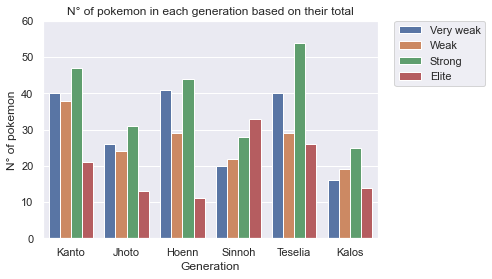

In [541]:
ax6=sns.barplot(data=levelpokemon3, x="Labeled generation",y="Total",hue="Level",order=['Kanto', 'Jhoto', 'Hoenn', 'Sinnoh', 'Teselia', 'Kalos'],hue_order=['Very weak', 'Weak', 'Strong', 'Elite'])

ax6.set(title="N° of pokemon in each generation based on their total",ylabel="N° of pokemon",xlabel="Generation",ylim=(0,60))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Interpretation** Based on the last graphic, we can say that in the fourth generation (Sinnoh) there were introduced more elite pokemon than in any other generation. What is more, in Sinnoh there are more elite pokemon than pokemon of the other three levels we have just created.